In [1]:
using ReinforcementLearningCore
using RLIntro, RLIntro.WindyGridWorld

┌ Info: Precompiling RLIntro [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1273


In [4]:
env = WindyGridWorldEnv()
ns = length(get_observation_space(env))
na = length(get_action_space(env))

agent = Agent(
    policy=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularApproximator(;n_state=ns, n_action=na),
            optimizer=Descent(0.5)
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory=EpisodicCompactSARTSATrajectory()
);

hook = StepsPerEpisode()
run(agent, env, StopAfterStep(8000),hook)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


StepsPerEpisode([929, 358, 225, 144, 135, 35, 134, 30, 28, 29  …  15, 18, 21, 17, 21, 20, 21, 23, 17, 17], 20, "TRAINING")

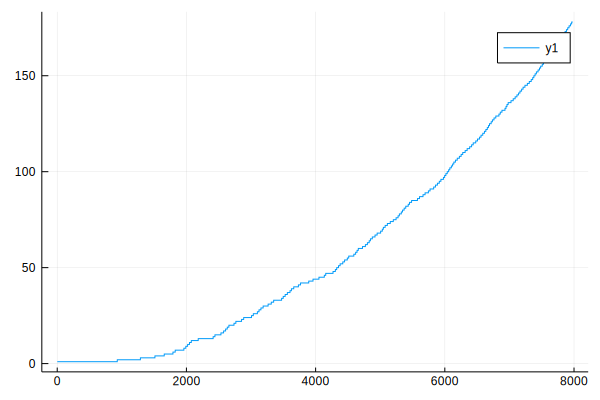

In [5]:
using Plots
plot([i for (i, x) in enumerate(hook.steps) for _ in 1:x])